<a href="https://colab.research.google.com/github/akhilnazim0/Data-Science-Project/blob/main/Data_Science_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import common modules for data analysis/necessary modules that needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from scipy.stats import gaussian_kde, kurtosis, skew

In [2]:
#read data as dataframe
df = pd.read_csv('/content/drive/MyDrive/Data science project/diabetes_012_health_indicators_BRFSS2015.csv')

 diabetes _ 012 _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables


*   **Diabetes**_012 is 0 = no diabetes 1 = prediabetes 2 = diabetes
*   **HighBP** is 0 = no high BP 1 = high BP
*  **HighChol** is 0 = no high cholesterol 1 = high cholesterol
*  **CholCHeck** is 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
*   **Smoker** is Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
*   **Stroke** is (Ever told) you had a stroke. 0 = no 1 = yes
*   **HeartDiseaseorAttack** is coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
*   **PhysActivity** is physical activity in past 30 days - not including job 0 = no 1 = yes
*   **Fruits** is Consume Fruit 1 or more times per day 0 = no 1 = yes
*   **Age** is 13-level age category (_AGEG5YR see codebook) 1 = 18-24 , 9 = 60-64 , 13 = 80 or older


In [3]:
#what does dataframe look like?
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
#To see the dimensions
df.shape


(253680, 22)

In [5]:
#What are the datatype of the columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
#Basic Descriptive
pd.set_option('display.float_format', lambda x: '% 3.f' % x)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680,0,1,0,0,0,0,2
HighBP,253680,0,0,0,0,0,1,1
HighChol,253680,0,0,0,0,0,1,1
CholCheck,253680,1,0,0,1,1,1,1
BMI,253680,28,7,12,24,27,31,98
Smoker,253680,0,0,0,0,0,1,1
Stroke,253680,0,0,0,0,0,0,1
HeartDiseaseorAttack,253680,0,0,0,0,0,0,1
PhysActivity,253680,1,0,0,1,1,1,1
Fruits,253680,1,0,0,0,1,1,1


In [7]:
#To find any missing values in dataframe
print(f'The null values in the dataset are\n{df.isna().sum()}')

The null values in the dataset are
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


**2. FILTERING**

In [8]:
#Delete/Remove unwanted columns or not usefull to the model
df_f = df.drop(['Income','Education','Veggies','Fruits'],axis=1, )
df_f.shape

(253680, 18)

In [9]:
#finding missing value
df_f.isnull()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
253676,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
253677,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
253678,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
#To find which column is missing value
df_f.isnull().sum()*100/len(df_f)

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
HvyAlcoholConsump,0


This means there is no missing value in the columns

In [11]:
#how to check for row Duplication
df_f.duplicated().sum()

80930

In [12]:
#To see the Duplicate rows
df_f.loc[df_f.duplicated(), :]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
913,0,1,1,1,23,0,0,0,1,0,1,0,3,0,0,0,0,13
1057,0,0,0,1,26,0,0,0,1,0,1,0,2,0,0,0,1,10
1061,0,0,1,1,25,1,0,0,1,0,1,0,2,0,0,0,0,11
1200,0,1,0,1,29,0,0,0,1,0,1,0,2,0,0,0,0,9
1242,2,1,1,1,27,1,0,0,0,0,1,0,5,0,30,1,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253662,0,0,0,1,16,0,0,0,1,0,1,0,1,0,0,0,0,5
253667,0,1,1,1,28,1,0,0,0,0,1,0,3,0,0,0,0,11
253672,0,1,0,1,30,1,0,1,1,0,1,0,3,0,0,0,1,12
253674,0,0,0,1,27,0,0,0,0,0,1,0,1,0,0,0,0,3


In [13]:
#locating duplicate rows
df_f.loc[df_f.duplicated(keep='last'), :]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
3,0,1,0,1,27,0,0,0,1,0,1,0,2,0,0,0,0,11
5,0,1,1,1,25,1,0,0,1,0,1,0,2,0,2,0,1,10
7,0,1,1,1,25,1,0,0,1,0,1,0,3,0,0,1,0,11
9,0,0,0,1,24,0,0,0,0,0,1,0,2,0,0,0,1,8
10,2,0,0,1,25,1,0,0,1,0,1,0,3,0,0,0,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252946,0,0,0,1,25,0,0,0,1,0,1,0,3,0,0,0,0,2
252980,0,0,0,1,26,0,0,0,1,0,1,0,3,0,0,0,1,6
253034,0,1,0,1,26,0,0,0,0,0,1,0,3,0,0,0,1,10
253138,0,0,0,1,17,0,0,0,1,0,1,0,1,0,7,0,0,1


In [14]:
#Remove Duplicate rows
df_f.drop_duplicates(keep='last').shape

(172750, 18)

In [15]:
df_f['Age'].unique()

array([ 9.,  7., 11., 10.,  8., 13.,  4.,  6.,  2., 12.,  5.,  1.,  3.])

In [16]:
# Define the mapping dictionary for age categories
age_category_map = {
    1: 'Young adults',
    2: 'Young adults',
    3: 'Adults',
    5: 'Adults',
    6: 'Adults',
    7: 'Middle-aged',
    8: 'Middle-aged',
    9: 'Middle-aged',
    10: 'Old',
    11: 'Old',
    12: 'Old',
    13: 'Old'
}

#the age codes to age categories
df_f['Age_Category'] = df_f['Age'].map(age_category_map)

# Display the updated DataFrame
print(df_f)

        Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                  0       1         1          1   40       1       0   
1                  0       0         0          0   25       1       0   
2                  0       1         1          1   28       0       0   
3                  0       1         0          1   27       0       0   
4                  0       1         1          1   24       0       0   
...              ...     ...       ...        ...  ...     ...     ...   
253675             0       1         1          1   45       0       0   
253676             2       1         1          1   18       0       0   
253677             0       0         0          1   28       0       0   
253678             0       1         0          1   23       0       0   
253679             2       1         1          1   25       0       0   

        HeartDiseaseorAttack  PhysActivity  HvyAlcoholConsump  AnyHealthcare  \
0                          0   

<Axes: xlabel='Age_Category'>

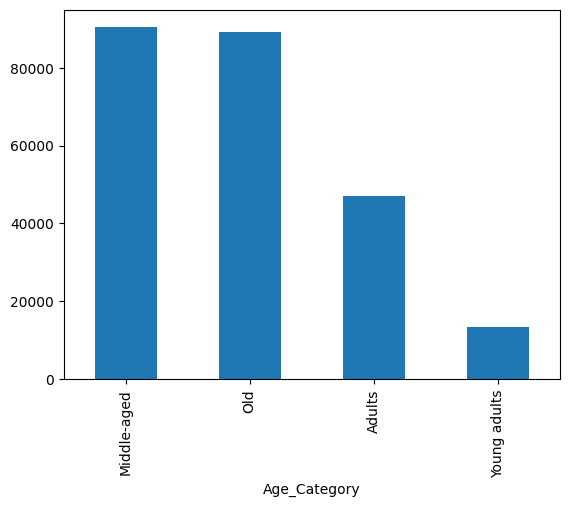

In [17]:
df_f['Age_Category'].value_counts().plot(kind='bar')

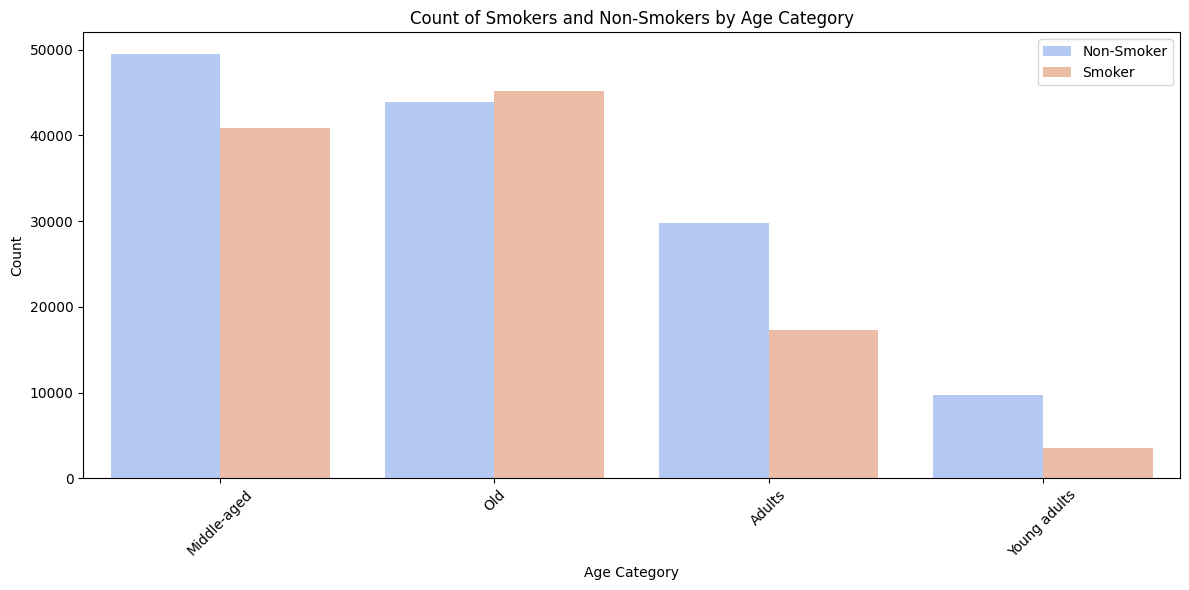

In [18]:
# a bar plot to show the count of smokers and non-smokers in each age category
plt.figure(figsize=(12, 6))
sns.countplot(data=df_f, x='Age_Category', hue='Smoker', palette='coolwarm')

# Add title and labels
plt.title('Count of Smokers and Non-Smokers by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='',labels=['Non-Smoker', 'Smoker'])
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

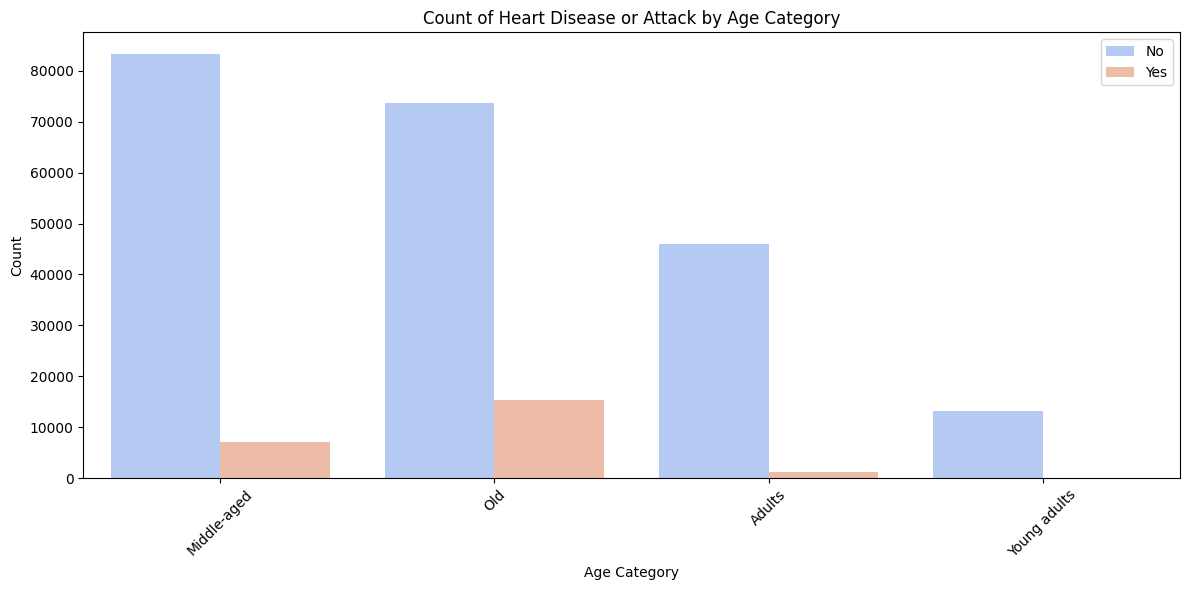

In [19]:
# Create a bar plot to show the count of individuals with and without heart disease or attack in each age category
plt.figure(figsize=(12, 6))
sns.countplot(data=df_f, x='Age_Category', hue='HeartDiseaseorAttack', palette='coolwarm')

# Add title and labels
plt.title('Count of Heart Disease or Attack by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Pricipal Data Analysis**

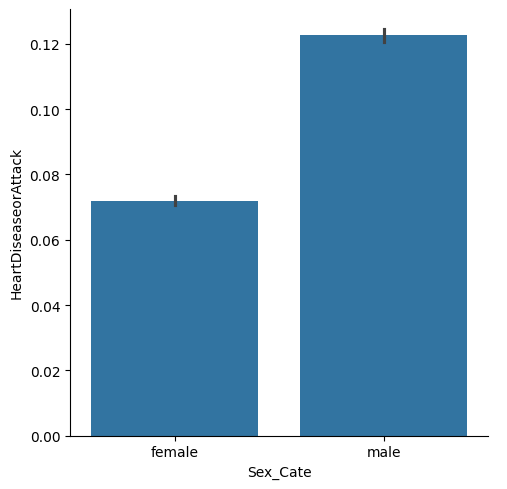

In [20]:
# Convert 'Sex' to categorical
df_f['Sex_Cate'] = df_f['Sex'].replace([0.0, 1.0], ['female', 'male'])

# Encode categorical variables using one-hot encoding
df_f_encoded = pd.get_dummies(df_f, columns=['Age_Category', 'Sex_Cate'], drop_first=True)
df_f.groupby('Sex_Cate')['HeartDiseaseorAttack'].mean()
sns.catplot(data=df_f, y='HeartDiseaseorAttack', x='Sex_Cate', kind='bar')
plt.show()


<ipython-input-21-402eb5aaaad6>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_f, x='Sex_Cate', y='HeartDiseaseorAttack', estimator='mean',ci=None,palette=palette)
<ipython-input-21-402eb5aaaad6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_f, x='Sex_Cate', y='HeartDiseaseorAttack', estimator='mean',ci=None,palette=palette)
<ipython-input-21-402eb5aaaad6>:8: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=df_f, x='Sex_Cate', y='HeartDiseaseorAttack', estimator='mean',ci=None,palette=palette)


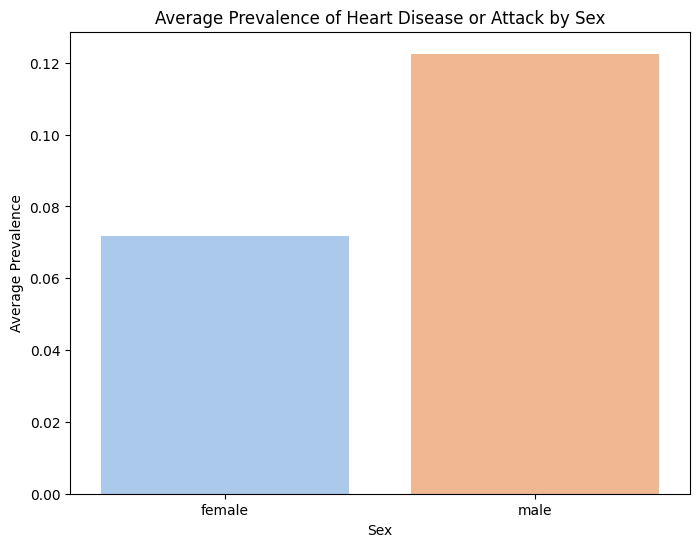

In [21]:

#Calculate the average prevalence of heart disease or attack by sex category
avg_prevalence = df_f.groupby('Sex_Cate')['HeartDiseaseorAttack'].mean()

# Plotting the data
plt.figure(figsize=(8, 6))
# Use a color palette
palette = sns.color_palette('pastel')  # You can choose other palettes like 'viridis', 'coolwarm', etc.
sns.barplot(data=df_f, x='Sex_Cate', y='HeartDiseaseorAttack', estimator='mean',ci=None,palette=palette)

# Adding titles and labels
plt.title('Average Prevalence of Heart Disease or Attack by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Prevalence')
plt.xticks(rotation=0)  # Rotate x labels if necessary

# Show the plot
plt.show()

In [22]:
# Convert 'Sex_Cate' to numeric
df_f_encoded = pd.get_dummies(df_f, columns=['Age_Category','Sex_Cate'], drop_first=True)

# Re-separate features and target variable after encoding
X = df_f_encoded.drop('HeartDiseaseorAttack', axis=1)
y = df_f_encoded['HeartDiseaseorAttack']

# Verify all columns in X are numeric
print(X.dtypes)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the first few rows and data types to confirm encoding
print(X.head())
print(X.dtypes)

Diabetes_012                 float64
HighBP                       float64
HighChol                     float64
CholCheck                    float64
BMI                          float64
Smoker                       float64
Stroke                       float64
PhysActivity                 float64
HvyAlcoholConsump            float64
AnyHealthcare                float64
NoDocbcCost                  float64
GenHlth                      float64
MentHlth                     float64
PhysHlth                     float64
DiffWalk                     float64
Sex                          float64
Age                          float64
Age_Category_Middle-aged        bool
Age_Category_Old                bool
Age_Category_Young adults       bool
Sex_Cate_male                   bool
dtype: object
   Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0             0       1         1          1   40       1       0   
1             0       0         0          0   25       1       0   
2 

In [23]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=10)
X_train_balanced, y_train_balanced = smote.fit_resample(X, y)

# Verify the distribution of the classes
print("Class distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

print("Number of features in X_train_balanced:", X_train_balanced.shape[1])

# Initialize PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_train_balanced)

# Create a DataFrame with PCA components
df_pca = pd.DataFrame(data=X_pca, columns=['HighBP', 'HighChol','HeartDiseaseorAttack','CholCheck','BMI','Diabetes_012','Smoker','Stroke','PhysHlth','HvyAlcoholConsump'])
df_pca['HeartDiseaseorAttack'] = y_train_balanced.reset_index(drop=True)


Class distribution after SMOTE:
HeartDiseaseorAttack
0    229787
1    229787
Name: count, dtype: int64
Number of features in X_train_balanced: 21


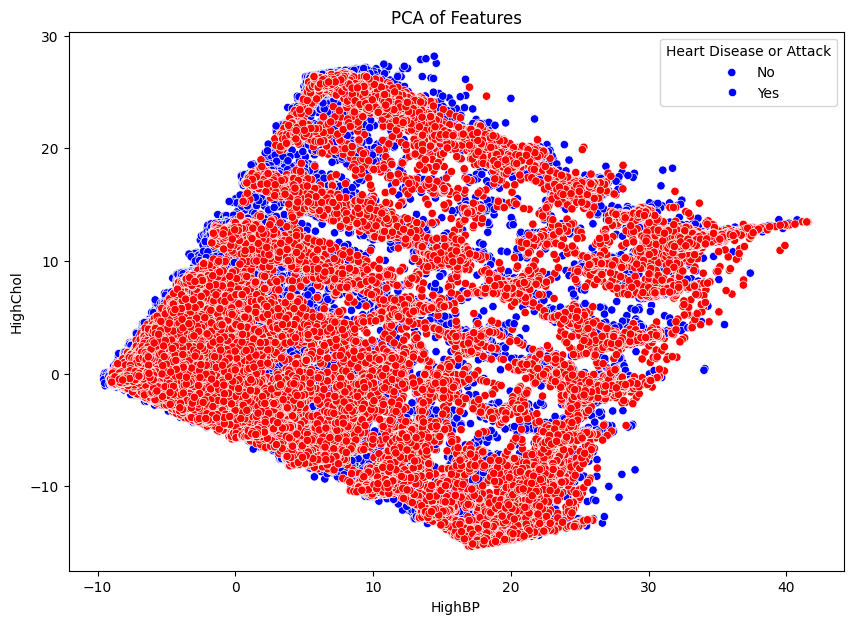

In [24]:
# Scatter plot of PCA components
plt.figure(figsize=(10, 7))
sns.scatterplot(x='HighBP', y='HighChol', hue='HeartDiseaseorAttack', data=df_pca,palette={0: 'blue', 1: 'red'})
plt.title('PCA of Features')
plt.xlabel('HighBP')
plt.ylabel('HighChol')
plt.legend(title='Heart Disease or Attack', labels=['No', 'Yes'])
plt.show()


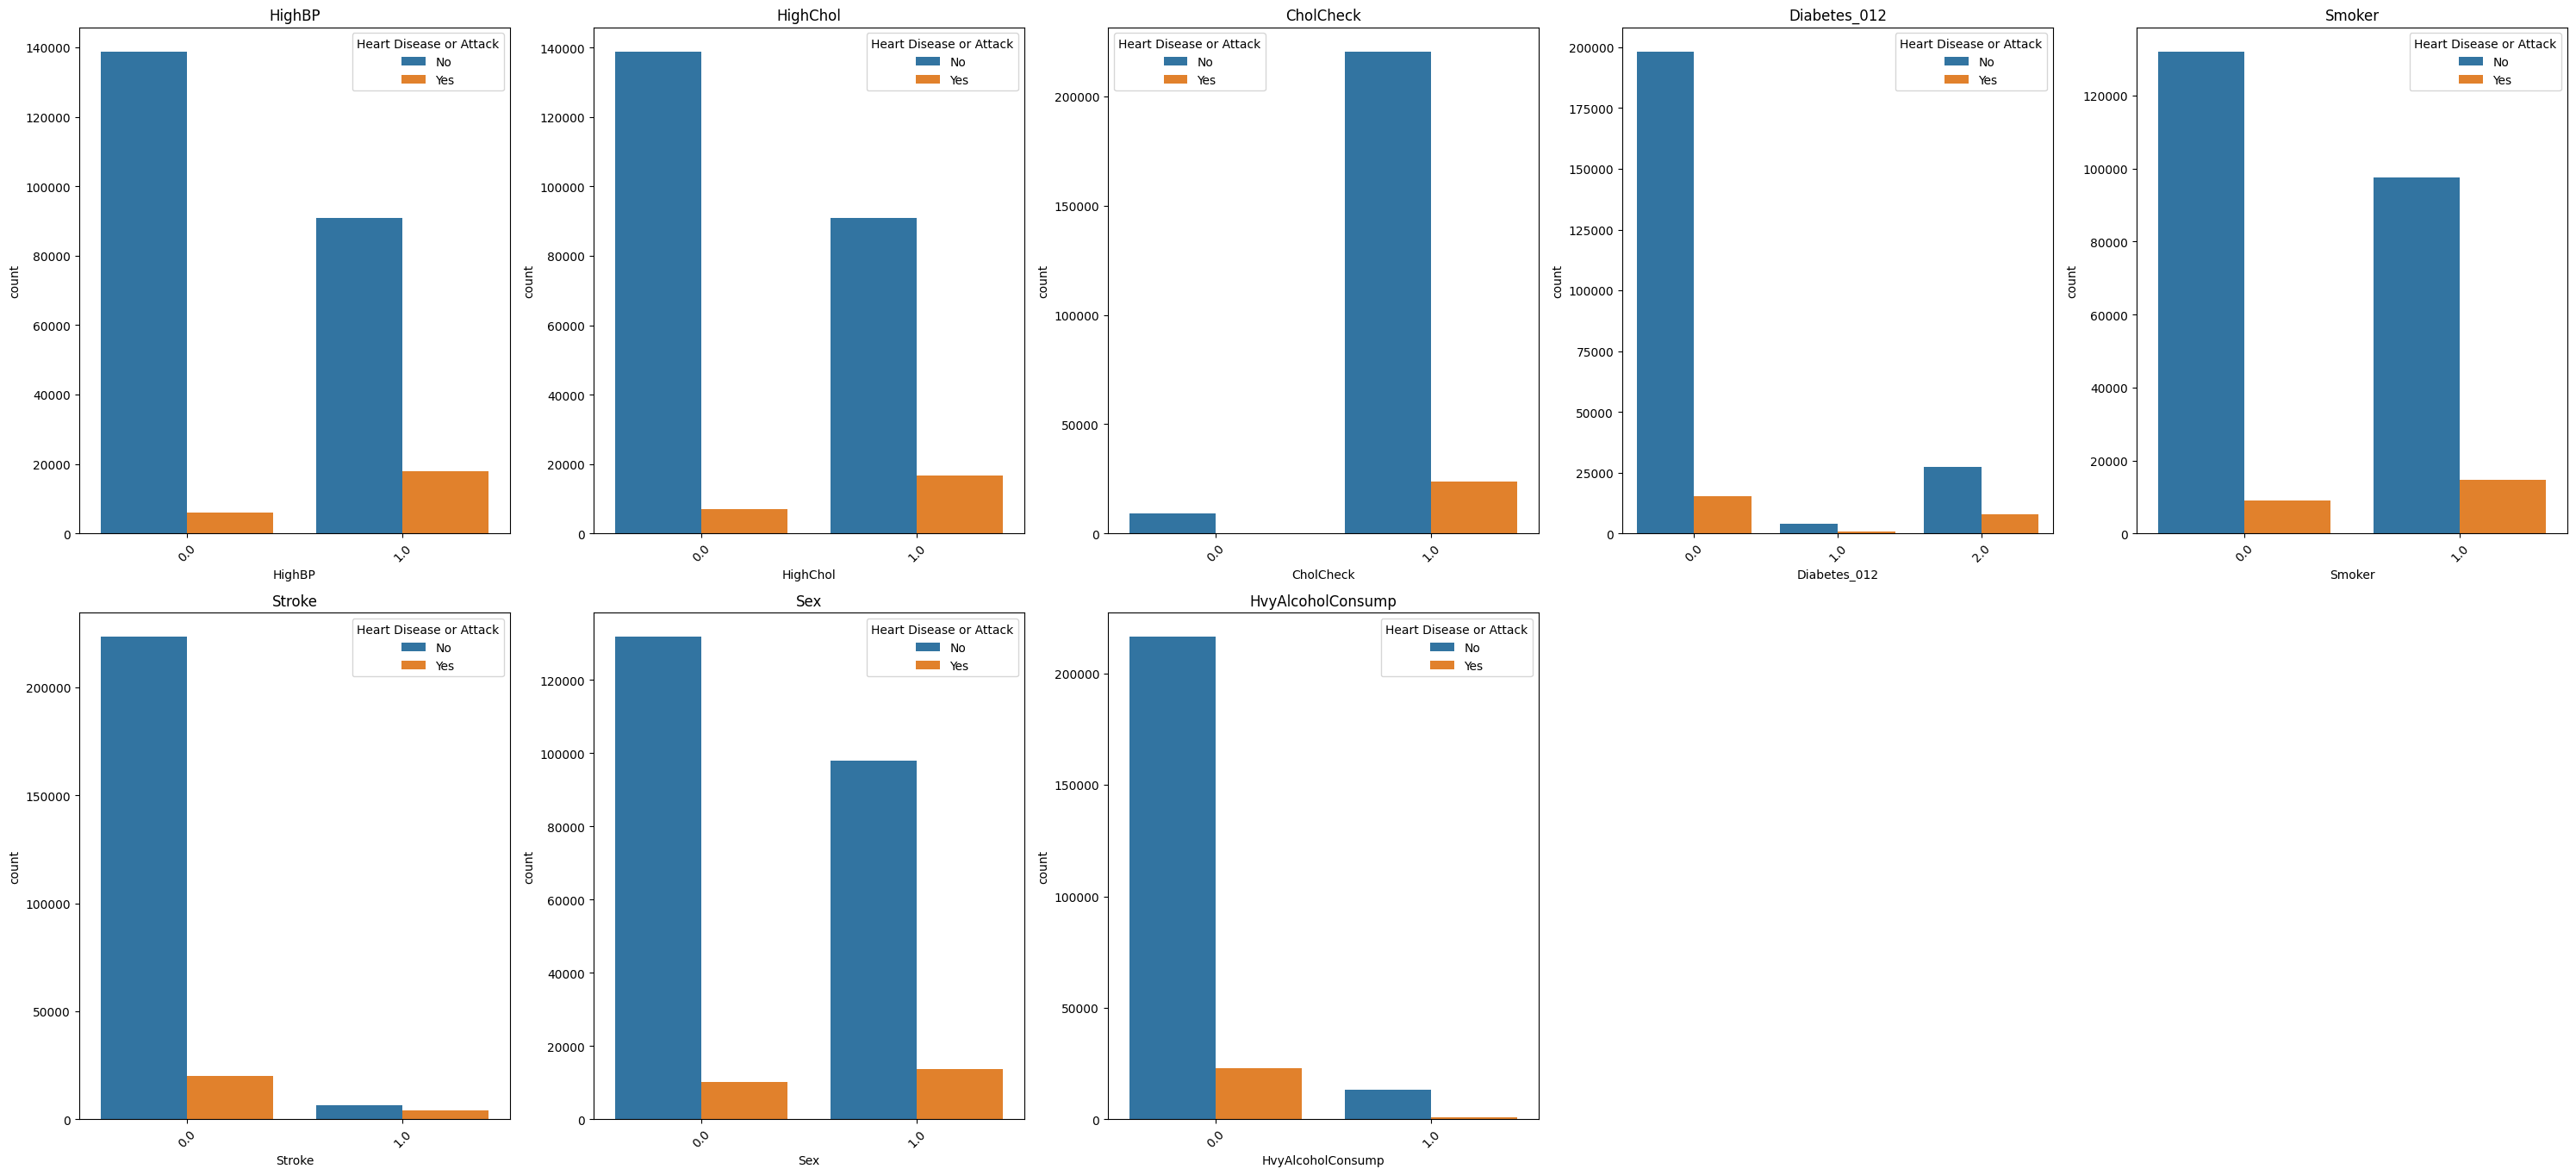

In [25]:
# Specify the columns you want to plot
columns_to_plot = ['HighBP', 'HighChol', 'CholCheck',
                    'Diabetes_012', 'Smoker', 'Stroke', 'Sex',  'HvyAlcoholConsump']

# Create a subset of the DataFrame with the selected columns
df_subset = df_f[columns_to_plot]

# Create the figure and axes
plt.figure(figsize=(30, 20))  # Adjust figure size as needed

# Loop through the columns and create a subplot for each
for i, column in enumerate(columns_to_plot):
    plt.subplot(3, 5, i + 1)
    sns.countplot(x=column, hue="HeartDiseaseorAttack", data=df_f)
    plt.title(column)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
     # Update the legend labels
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, ['No', 'Yes'], title='Heart Disease or Attack')

plt.tight_layout()
plt.show()

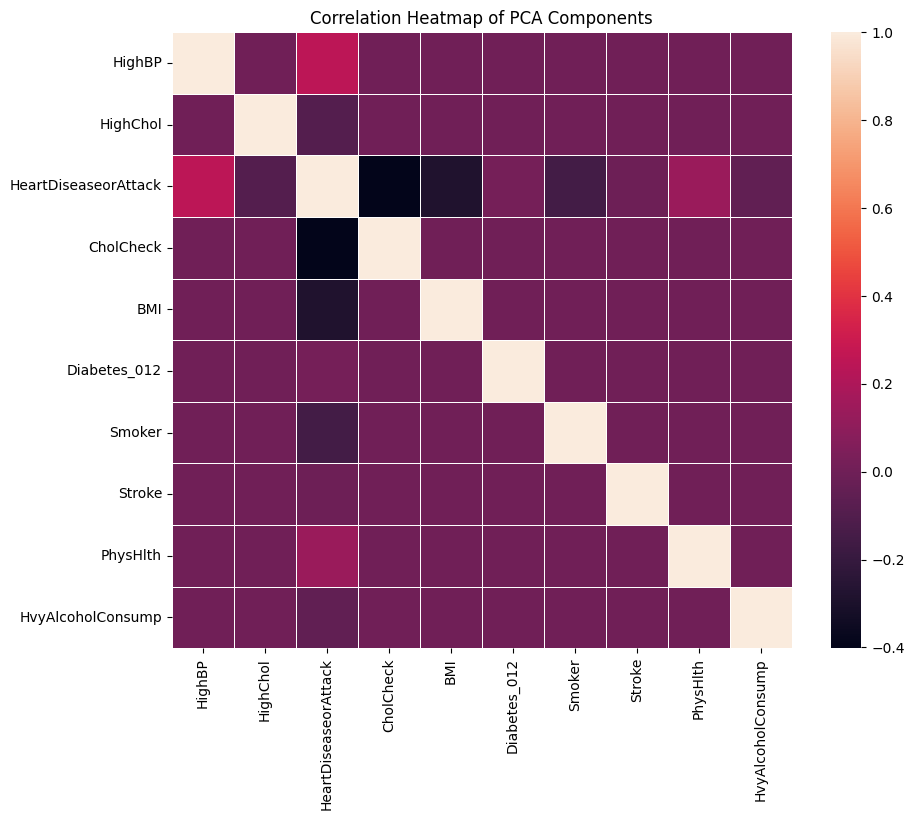

In [26]:
# Calculate the correlation matrix
corr_matrix_pca = df_pca.corr()

# Plot the heatmap
dpi = 200 # 200-300 as per guidelines
# maxpix = 670  # max pixels of plot
maxpix = 3200  # max pixels of plot
width = maxpix / dpi  # max allowed with
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_pca, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of PCA Components')
plt.show()

# **Generating Machine Learning Models**

In [27]:
# Assuming df_pca is your DataFrame and 'HeartDiseaseorAttack' is your target variable
X = df_pca.drop(columns=['HeartDiseaseorAttack'])
y = df_pca['HeartDiseaseorAttack']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [28]:

# Model 1
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.74      0.77     68810
         1.0       0.76      0.81      0.78     69063

    accuracy                           0.77    137873
   macro avg       0.78      0.77      0.77    137873
weighted avg       0.78      0.77      0.77    137873

[[51076 17734]
 [13391 55672]]


In [29]:
# Model 2
model_2 = RandomForestClassifier()
model_2.fit(X_train, y_train)

# Evaluate the model
y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.92      0.87      0.89     68810
         1.0       0.88      0.92      0.90     69063

    accuracy                           0.90    137873
   macro avg       0.90      0.90      0.90    137873
weighted avg       0.90      0.90      0.90    137873

[[59784  9026]
 [ 5320 63743]]


In [30]:
# Model 3
model_3= KNeighborsClassifier()
model_3.fit(X_train, y_train)
y_pred = model_3.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85     68810
         1.0       0.82      0.90      0.86     69063

    accuracy                           0.85    137873
   macro avg       0.86      0.85      0.85    137873
weighted avg       0.86      0.85      0.85    137873

[[55625 13185]
 [ 6948 62115]]


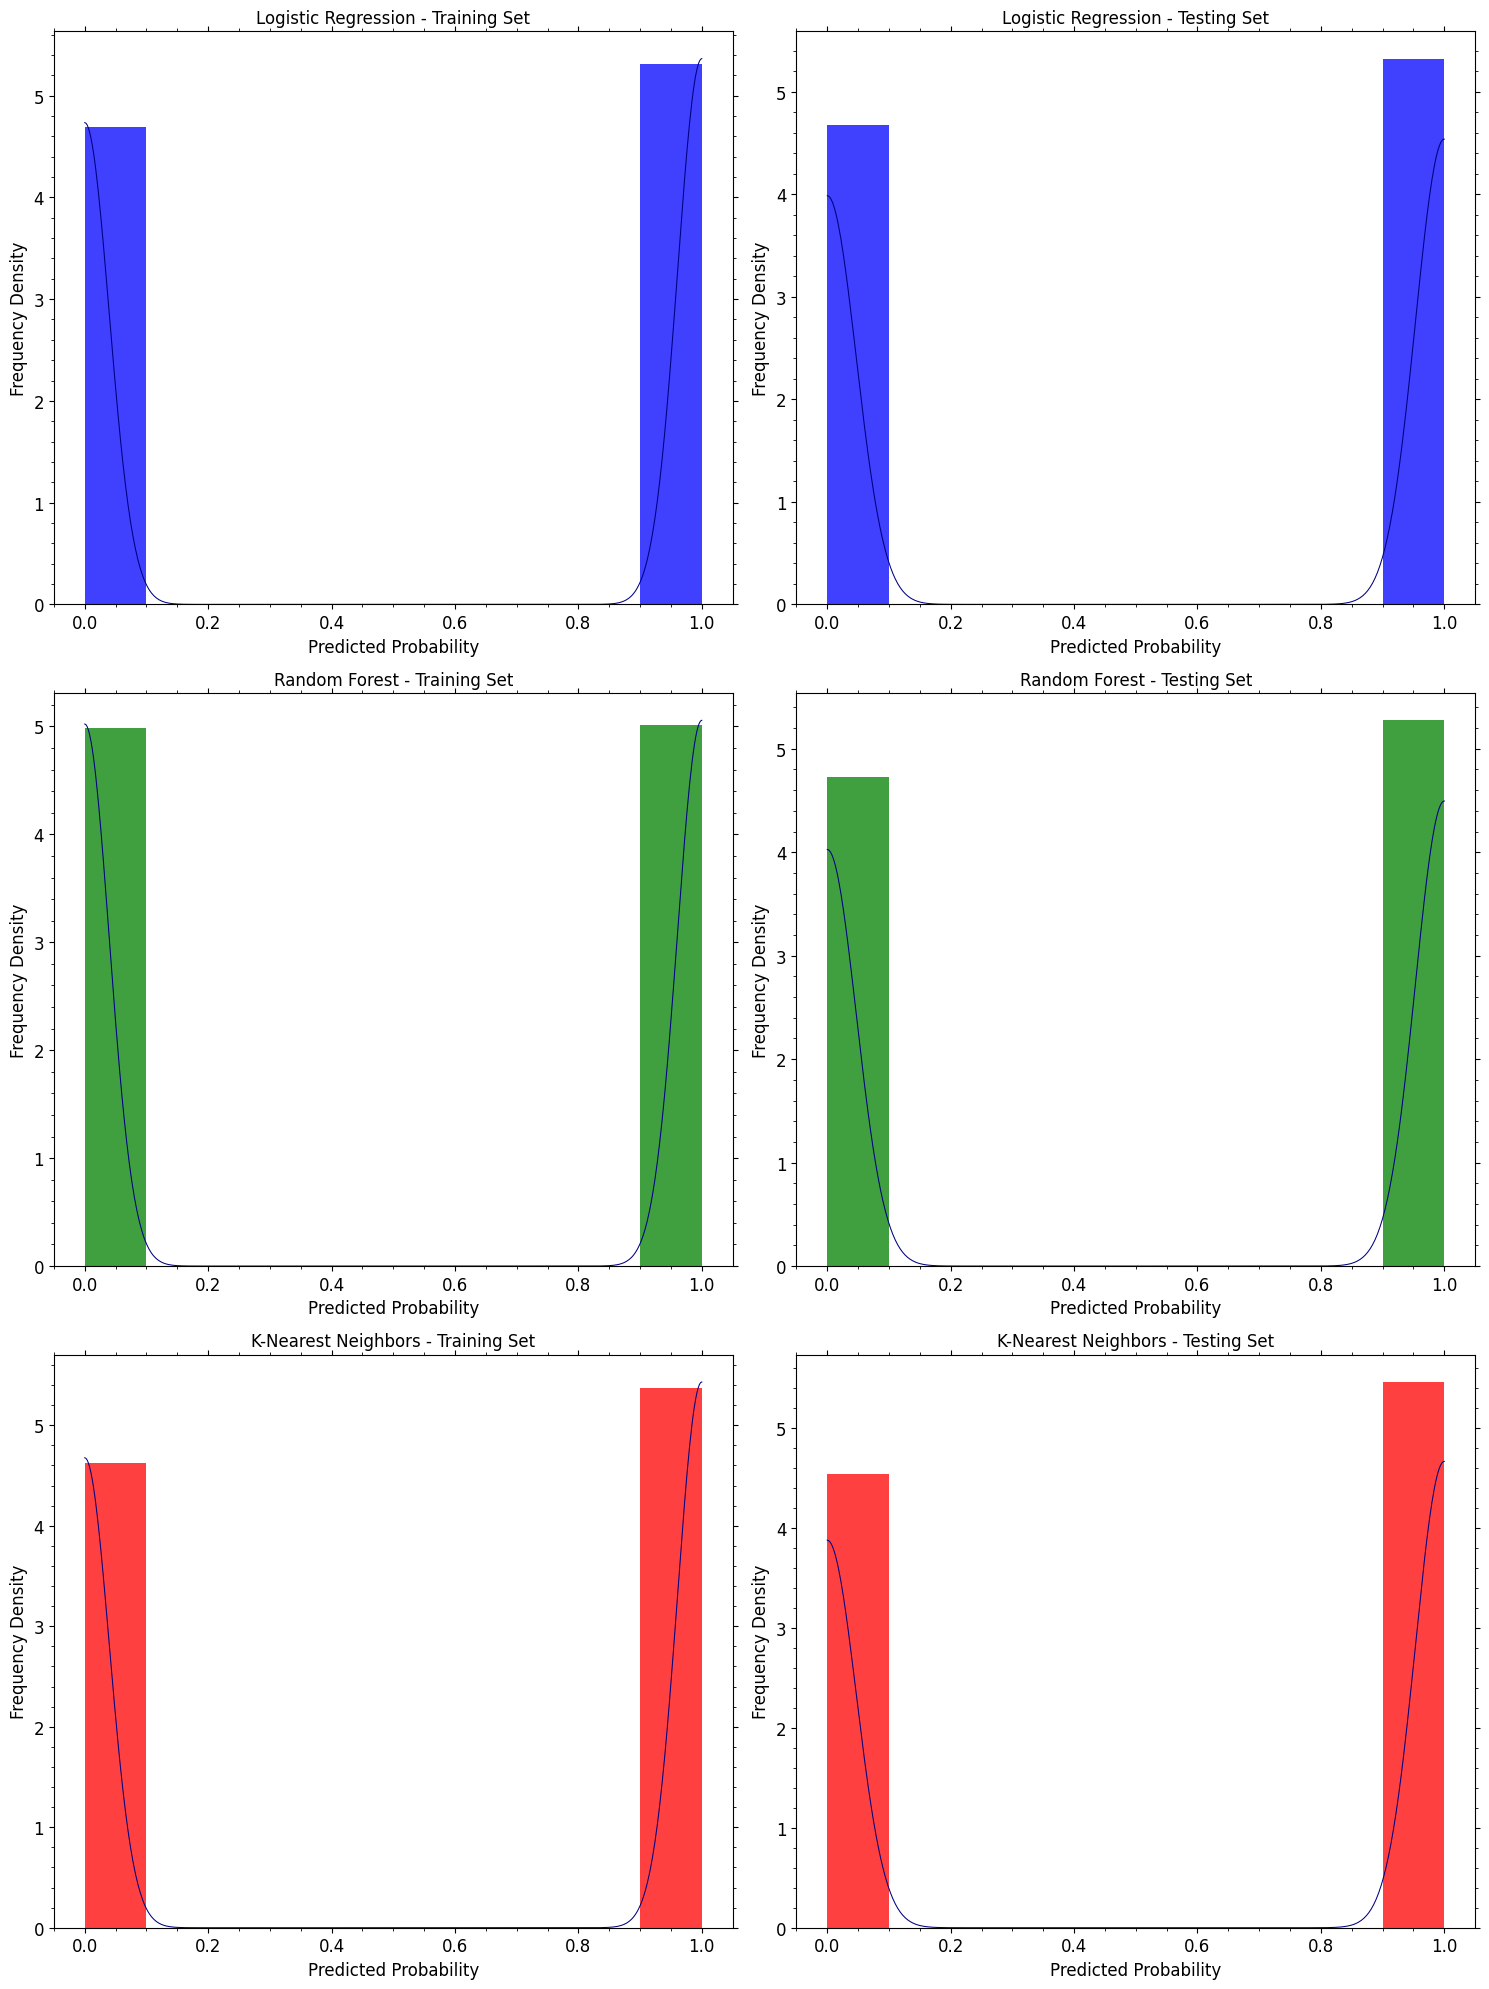

Classification Report for Logistic Regression on Training Data
              precision    recall  f1-score   support

         0.0       0.79      0.74      0.77    160977
         1.0       0.76      0.81      0.78    160724

    accuracy                           0.78    321701
   macro avg       0.78      0.78      0.78    321701
weighted avg       0.78      0.78      0.78    321701

[[119842  41135]
 [ 30989 129735]]


Classification Report for Logistic Regression on Testing Data
              precision    recall  f1-score   support

         0.0       0.79      0.74      0.77     68810
         1.0       0.76      0.81      0.78     69063

    accuracy                           0.77    137873
   macro avg       0.78      0.77      0.77    137873
weighted avg       0.78      0.77      0.77    137873

[[51076 17734]
 [13391 55672]]


Classification Report for Random Forest on Training Data
              precision    recall  f1-score   support

         0.0       0.98      0.98      

In [31]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
}

# Train models and collect predictions
train_predictions = {}
test_predictions = {}

for model_name, model in models.items():
    # Train the model with the full training data (including the target variable)
    model.fit(X_train, y_train)
    # Predict on the training data
    train_predictions[model_name] = model.predict(X_train)
    # Predict on the testing data without the target variable
    test_predictions[model_name] = model.predict(X_test.drop(columns=['HeartDiseaseorAttack'], errors='ignore'))  # This part is the evaluation with dropped target variable

# Configuration for plots
rcParams.update({
    'axes.labelsize': 'large', 'axes.titlesize': 'large',
    'xtick.labelsize': 'large', 'ytick.labelsize': 'large',
    'legend.fontsize': 'x-small', 'legend.frameon': False,
    'legend.facecolor': 'none', 'legend.handletextpad': 0.25,
    'font.serif': ['Computer Modern', 'Helvetica', 'Arial',
                   'Tahoma', 'Lucida Grande', 'DejaVu Sans'],
    'font.family': 'serif', 'mathtext.fontset': 'cm', 'mathtext.default': 'regular',
    'figure.figsize': [15, 10], 'figure.dpi': 100,
    'text.color': "black", 'axes.labelcolor': "black", 'axes.facecolor': 'white',
    'xtick.color': 'black', 'ytick.color': 'black', 'figure.facecolor': 'none',
    'lines.linewidth': .75, 'xtick.top': True, 'ytick.right': True,
    'xtick.minor.visible': True, 'ytick.minor.visible': True,
    'text.usetex': False
})

# Plotting histograms and KDEs for each model's predictions
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
axs = axs.flatten()

bins = np.arange(0, 1.1, 0.1)
colors = ['blue', 'green', 'red']
model_names = list(models.keys())

for i, model_name in enumerate(model_names):
    train_pred = train_predictions[model_name]
    test_pred = test_predictions[model_name]

    # KDE for train predictions
    #KDEs provide a smoothed estimate of the probability density function, which helps in analyzing the
    #distribution of predicted probabilities more clearly than histograms alone.
    kde_train = gaussian_kde(train_pred)
    kde_test = gaussian_kde(test_pred)

    xgrid = np.linspace(0, 1, 500)
    kde_train_pdf = kde_train.evaluate(xgrid)
    kde_test_pdf = kde_test.evaluate(xgrid)

    # Plot histograms and KDEs
    axs[i*2].hist(train_pred, bins, density=True, alpha=0.75, color=colors[i])
    axs[i*2].plot(xgrid, kde_train_pdf, color='navy')
    axs[i*2].set_title(f'{model_name} - Training Set')
    axs[i*2].set_xlabel('Predicted Probability')
    axs[i*2].set_ylabel('Frequency Density')

    axs[i*2 + 1].hist(test_pred, bins, density=True, alpha=0.75, color=colors[i])
    axs[i*2 + 1].plot(xgrid, kde_test_pdf, color='navy')
    axs[i*2 + 1].set_title(f'{model_name} - Testing Set')
    axs[i*2 + 1].set_xlabel('Predicted Probability')
    axs[i*2 + 1].set_ylabel('Frequency Density')

plt.tight_layout()
plt.show()

# Printing Classification Reports
for model_name in model_names:
    print(f"Classification Report for {model_name} on Training Data")
    print(classification_report(y_train, train_predictions[model_name]))
    print(confusion_matrix(y_train, train_predictions[model_name]))
    print("\n")

    print(f"Classification Report for {model_name} on Testing Data")
    print(classification_report(y_test, test_predictions[model_name]))
    print(confusion_matrix(y_test, test_predictions[model_name]))
    print("\n")

***Calculate HeartDiseaseRisk Using Feature Weights***

In [32]:
# Define features and target
X = df_f_encoded.drop(columns=['HeartDiseaseorAttack'])
y = df_f_encoded['HeartDiseaseorAttack']

# Apply SMOTE to balance the data
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Standardize features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_resampled_scaled, y_resampled)

# Get coefficients (weights)
coefficients = log_reg.coef_[0]
feature_names = X.columns

# Apply scaling to the original data
X_scaled = scaler.transform(X)  # Transform original data using the same scaler

# Calculate the risk score using the original features
df_f_encoded['HeartDiseaseRisk'] = X_scaled.dot(coefficients)

# Normalize the risk score
scaler_risk = MinMaxScaler()
df_f_encoded['HeartDiseaseRisk'] = scaler_risk.fit_transform(df_f_encoded[['HeartDiseaseRisk']])

# Display the first few rows to confirm
print(df_f_encoded[['HeartDiseaseRisk', 'HeartDiseaseorAttack']].head())

   HeartDiseaseRisk  HeartDiseaseorAttack
0                 1                     0
1                 0                     0
2                 1                     0
3                 0                     0
4                 1                     0


**Split the Data for Training and Testing**

In [38]:
# Define the new features and target variable
X_new = df_f_encoded.drop(columns=['HeartDiseaseorAttack', 'HeartDiseaseRisk'])  # Drop old target
y_new = df_f_encoded['HeartDiseaseRisk']  # New continuous target

# Split the data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=10)


**Train Regression Models**
*Since HeartDiseaseRisk is continuous, you should use regression models*


In [51]:
# Define the regression models
models_regression = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
}

# Train the models
for model_name, model in models_regression.items():
    model.fit(X_train_new, y_train_new)
    y_pred_train = model.predict(X_train_new)
    y_pred_test = model.predict(X_test_new)

    # You can print or store predictions for further analysis
    print(f"{model_name} - Training R^2: {model.score(X_train_new, y_train_new)}")
    print(f"{model_name} - Testing R^2: {model.score(X_test_new, y_test_new)}\n")

Linear Regression - Training R^2: 1.0
Linear Regression - Testing R^2: 1.0

Random Forest Regressor - Training R^2: 0.9997754434175877
Random Forest Regressor - Testing R^2: 0.9983599149393123

K-Nearest Neighbors Regressor - Training R^2: 0.9592821317434517
K-Nearest Neighbors Regressor - Testing R^2: 0.9370813377451104



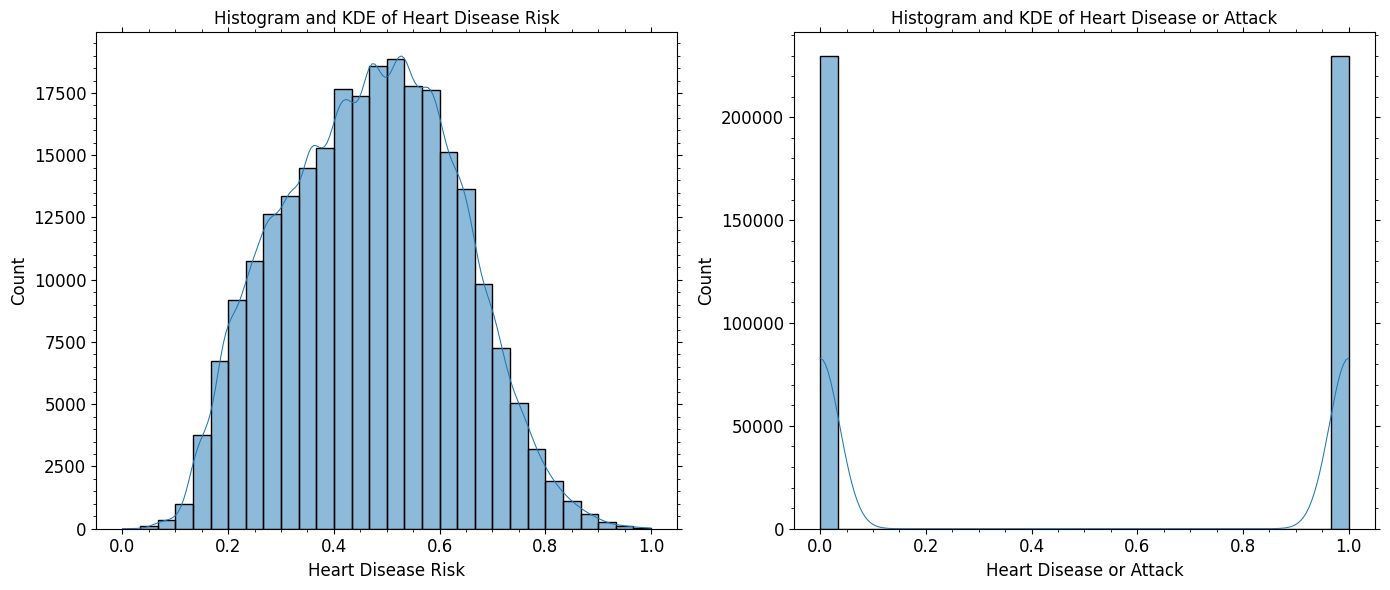

In [54]:
# Prepare the plot
plt.figure(figsize=(14, 6))

# Plot HeartDiseaseRisk
plt.subplot(1, 2, 1)
sns.histplot(df_f_encoded['HeartDiseaseRisk'], kde=True, bins=30)
plt.title('Histogram and KDE of Heart Disease Risk')
plt.xlabel('Heart Disease Risk')

# Plot HeartDiseaseOrAttack
plt.subplot(1, 2, 2)
sns.histplot(df_pca['HeartDiseaseorAttack'], kde=True, bins=30)
plt.title('Histogram and KDE of Heart Disease or Attack')
plt.xlabel('Heart Disease or Attack')

# Adjust layout
plt.tight_layout()
plt.show()

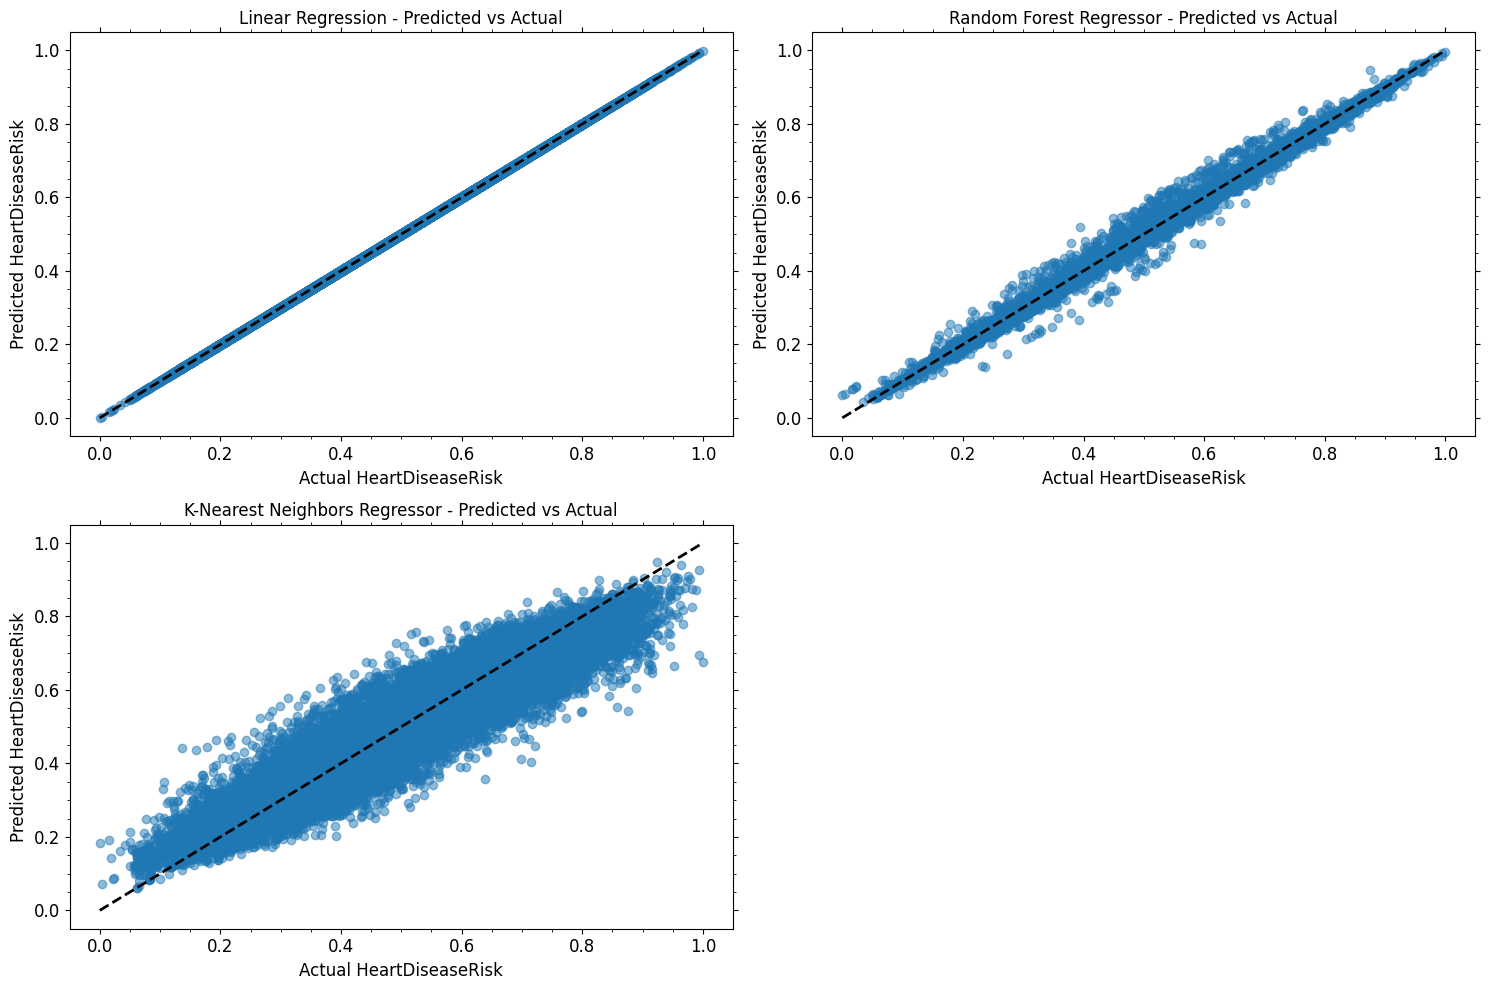

In [52]:
# Plotting predicted vs actual for each model
plt.figure(figsize=(15, 10))

for i, (model_name, model) in enumerate(models_regression.items()):
    plt.subplot(2, 2, i + 1)
    y_pred_test = model.predict(X_test_new)
    plt.scatter(y_test_new, y_pred_test, alpha=0.5)
    plt.plot([y_test_new.min(), y_test_new.max()], [y_test_new.min(), y_test_new.max()], 'k--', lw=2)
    plt.xlabel('Actual HeartDiseaseRisk')
    plt.ylabel('Predicted HeartDiseaseRisk')
    plt.title(f'{model_name} - Predicted vs Actual')

plt.tight_layout()
plt.show()